In [26]:
#import all needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the dataset
df_EM = pd.read_csv('PEA03.20231017T231015.csv')
df_EM.head()

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration (Persons in April),1987,All ages,Both sexes,Net migration,Thousand,-23.0
1,Estimated Migration (Persons in April),1987,All ages,Both sexes,Emigrants: All destinations,Thousand,40.2
2,Estimated Migration (Persons in April),1987,All ages,Both sexes,Immigrants: All origins,Thousand,17.2
3,Estimated Migration (Persons in April),1987,All ages,Male,Net migration,Thousand,NaN
4,Estimated Migration (Persons in April),1987,All ages,Male,Emigrants: All destinations,Thousand,NaN


In [3]:
#Shape of dataset
df_EM.shape

(1998, 7)

In [4]:
#Statistical description of dataset
df_EM.describe()

,Year,VALUE
count,1998.000000,1683.000000
mean,2005.000000,10.856625
std,10.679751,17.070445
min,1987.000000,-43.900000
25%,1996.000000,1.200000
50%,2005.000000,4.500000
75%,2014.000000,14.000000
max,2023.000000,151.100000


In [5]:
#Checking the columns
df_EM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STATISTIC Label         1998 non-null   object 
 1   Year                    1998 non-null   int64  
 2   Age Group               1998 non-null   object 
 3   Sex                     1998 non-null   object 
 4   Inward or Outward Flow  1998 non-null   object 
 5   UNIT                    1998 non-null   object 
 6   VALUE                   1683 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 109.4+ KB


In [6]:
#Filling the missing values
df_EM['VALUE'].fillna(df_EM['VALUE'].mean(), inplace=True)

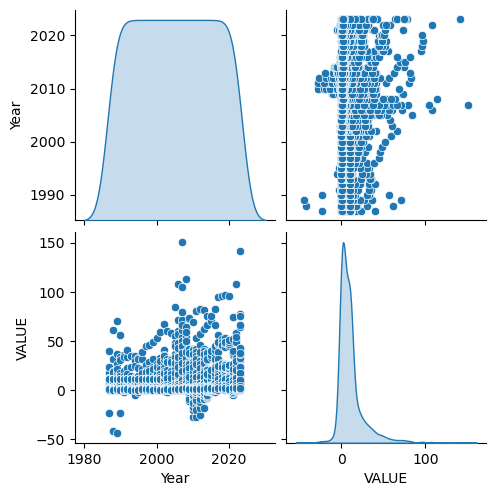

In [7]:
# Pairplot for dataset
sns.pairplot(df_EM, diag_kind='kde')
plt.show()

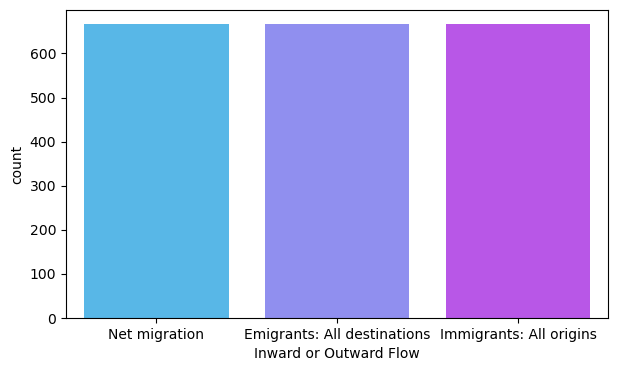

In [8]:
# Countplot for Inward or Outward Flow
plt.figure(figsize=(7, 4))
sns.countplot(x='Inward or Outward Flow', data=df_EM, palette='cool')
plt.show()

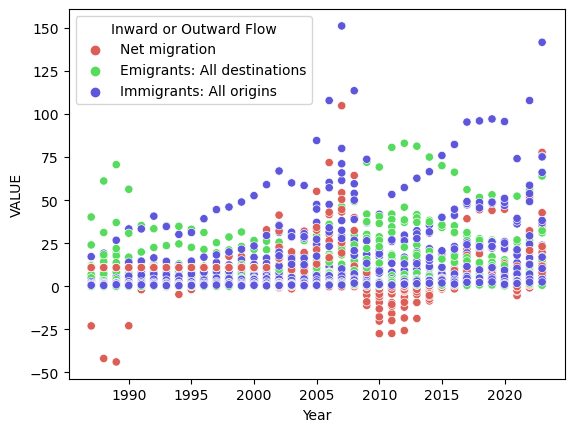

In [9]:
#Scatterplot for year and value using Inward or Outward Flow
sns.scatterplot(x= 'Year', y= 'VALUE', hue= 'Inward or Outward Flow', data = df_EM, palette='hls')
plt.show()

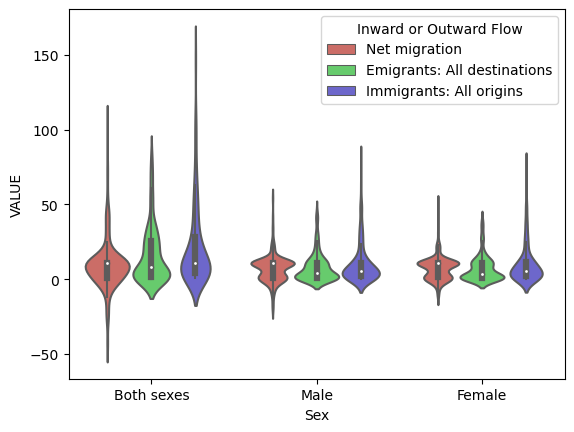

In [10]:
#Violinrplot for Sex and VALUE using Inward or Outward Flow
sns.violinplot(x= 'Sex', y= 'VALUE', hue= 'Inward or Outward Flow', data = df_EM, palette='hls')
plt.show()

In [11]:
#Convering categorical column to numerical
LE = LabelEncoder()
df_EM['STATISTIC Label'] = LE.fit_transform(df_EM['STATISTIC Label'])
df_EM['Age Group'] = LE.fit_transform(df_EM['Age Group'])
df_EM['Sex'] = LE.fit_transform(df_EM['Sex'])
df_EM['Inward or Outward Flow'] = LE.fit_transform(df_EM['Inward or Outward Flow'])
df_EM['UNIT'] = LE.fit_transform(df_EM['UNIT'])

In [12]:
#Checking the columns of dataset
df_EM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STATISTIC Label         1998 non-null   int32  
 1   Year                    1998 non-null   int64  
 2   Age Group               1998 non-null   int32  
 3   Sex                     1998 non-null   int32  
 4   Inward or Outward Flow  1998 non-null   int32  
 5   UNIT                    1998 non-null   int32  
 6   VALUE                   1998 non-null   float64
dtypes: float64(1), int32(5), int64(1)
memory usage: 70.4 KB


In [13]:
# Drop the 'UNIT' and 'STATISTIC Label' column from the DataFrame
df_EM.drop(columns=['UNIT','STATISTIC Label'], inplace=True)